# Narrative

This project will be looking into solving ODE's. For this project I picked Enzymes Kinetics. Enzyme kinetics is the study of reaction rates of enzyme catalysed reactions. I am working with the enzyme Catalse and its substrate hydrogen peroxide. For this problem there are going to be the enzyme, the substrate, the product, and the complex(enzyme substrate mixture). These variables will be denoted as S for substrate, P for product, E for Enzyme, and ES for complex. Before starting the experiment the file ode.py is provided. ode.py holds the equations for doing Euler, RK2, and RK4 method.  For setting up the experiment I made a function called reaction_1. This will calculate the derivatives of each independent variable. The depenent varibles will be the reaction rates denoted as k1 - k4. I will first conduct the experiment with only RK4 to see what the actual values of each independt variable will look like with the least amount of numerical error. 


From my results I found that as time goes on the substrate will increase in amount and the product will decrease in amount. These two seem to be proportional to each other. For the enzyme and its mixture, as the enzyme goes through time it will increase while ES will decrease. when it comes to making the graphs I found that incorporating Euler-RK4 on one graph it will take Nsteps/100 to actually see the difference betwween Euler and RK2. RK4 is still not shown. Once I got to nsteps/300 nothing should up onto the graph. I feel the cause of this is because of ho small the actual reaction rates and values of the independt varibales are. I picked values that were random but realistic for the reaction rates and values from a research paper for the independent variables. There will be three experiments: one with regular values for the dependent variables, One where k1 and k3 will be multiplied by 1.5 times and k2 and k4 will be divided by 1.5 times. The last experiment will be the opposite of the second experiment here k2 and k4 will by multiplied by 1.5 and k1 and k3 will be divided by 1.5. 

## The Results

## Verdict
Looking at the differences from each experiment the graphs changed slightly. From experiment 2 to experiment 3 I saw that the enzyme graphs changed.Experiment 3 seemed more straight then oscilating. I did not expect the graphs to completely change since it did not make logical sense since each independent variable has a specific role. S has to decrease while P has to increase. This goes the same way as for E and ES. Since the values are small going from molor to millimolar and vice versa. The graphs shouldnt have changed too drastically. 


### The science/equations

#### Derivative for S
$ \frac{ds}{dt} = -k1*s + k2*P $

#### Derivatie for P
$ \frac{dp}{dt} = k3*es - k4*e*p $

#### Derivative of E

$ \frac{de}{dt} = -k1*e*s + k2 *es + k3*es -k4*e*p $

#### Derivative of ES

$ \frac{des}{dt} = k1*e*s - k2*es -k3*es + k4*e*p$



In [1]:
from vpython import *
import ode
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

# Experiment 1

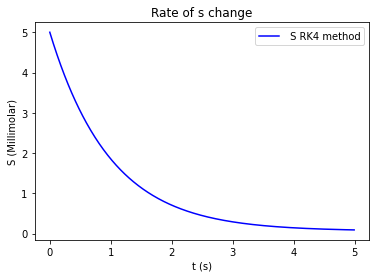

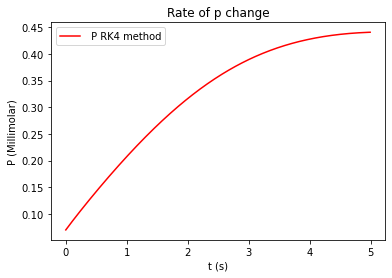

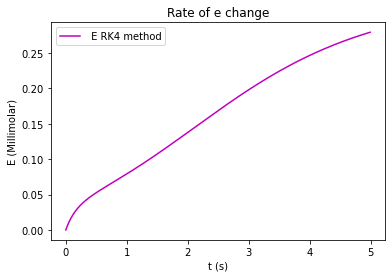

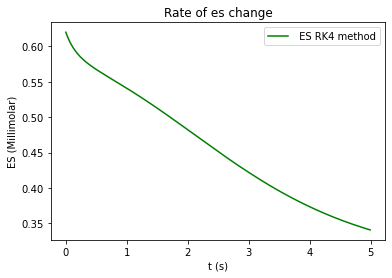

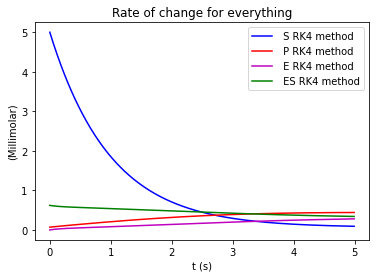

In [2]:

def reaction_1(dep, t):
    S  = dep[0] # Holds S from data array
    P = dep[1] # holds P from data array
    E = dep[2] # holds E from data array
    ES = dep[3] # holds ES from data array
    
# Dependant variables 

    k1 = 1
    k2 = 0.14
    k3 = 0.25
    k4 = 0.66
    
    deriv = np.zeros(4) # array to return derivative values
    
    deriv[0] = -k1*S + k2*P # derivative of S
    deriv[1] = k3*ES - k4*E*P #derivative of p
    deriv[2] = -k1*E*S + k2*ES + k3*ES -k4*E*P # derivative of e
    deriv[3] = k1*E*S - k2*ES - k3*ES + k4*E*P # derivative of es
    
    return deriv
    


t = 0
h = 0.01
Nsteps = int(5/h)
S = 5 #Molar
P = 0.07 # Molar 
ES = 0.620 # Molar
E = 1.2e-7# Molar

data = np.array([S,P,E,ES]) # Array that will be put into function reaction_1

# Declaring arrays with length Nsteps

Sarray = np.zeros(Nsteps)
Parray = np.zeros(Nsteps)
Tarray = np.zeros(Nsteps)
Earray = np.zeros(Nsteps)
ESarray = np.zeros(Nsteps)

Sarray[0] = S
Parray[0] = P
Tarray[0] = t
Earray[0] = E
ESarray[0] = ES

for n in range(1,Nsteps):
    
    data = ode.RK4(reaction_1,data,t,h) # Calculates the derivatives by plugging in data and time.
    
    t = t+ h # updates time

# Plugs in results from function into each array specified.

    Tarray[n] = t
    Sarray[n] = data[0]
    Parray[n] = data[1]
    Earray[n] = data[2]
    ESarray[n] = data[3]
    
# Area where the graphs are made.

#Plots the results of S via RK4   
fig = plt.figure()
plt.title("S Vs Time")
plt.plot(Tarray,Sarray, 'b-', label=' S RK4 method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()
    
    
#Plots the results of P via RK4    
fig = plt.figure()
plt.title("P Vs Time)
plt.plot(Tarray,Parray, 'r-', label=' P RK4 method')
plt.xlabel('t (s)')
plt.ylabel('P (Millimolar)')
plt.legend()
plt.show()

#Plots the results of E via RK4

fig = plt.figure()
plt.title("E Vs Time")
plt.plot(Tarray,Earray, 'm-', label=' E RK4 method')
plt.xlabel('t (s)')
plt.ylabel('E (Millimolar)')
plt.legend()
plt.show()

#Plots the results of ES via RK4
fig = plt.figure()
plt.title("ES Vs Time")
plt.plot(Tarray,ESarray, 'g-', label=' ES RK4 method')
plt.xlabel('t (s)')
plt.ylabel('ES (Millimolar)')
plt.legend()
plt.show()
    
#Plots with all of the graphs
fig = plt.figure()
plt.title("Independent variables Vs Time ")
plt.plot(Tarray,Sarray, 'b-', label=' S RK4 method')
plt.plot(Tarray,Parray, 'r-', label=' P RK4 method')
plt.plot(Tarray,Earray, 'm-', label=' E RK4 method')
plt.plot(Tarray,ESarray, 'g-', label=' ES RK4 method')
plt.xlabel('t (s)')
plt.ylabel( '(Millimolar)')
plt.legend()
plt.show()



# Experiment 2

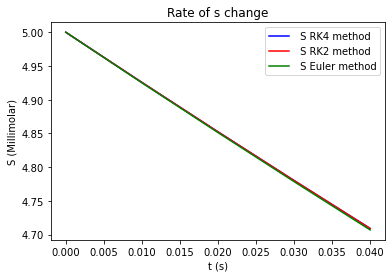

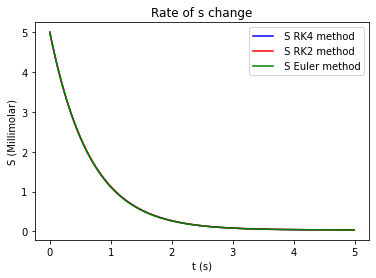

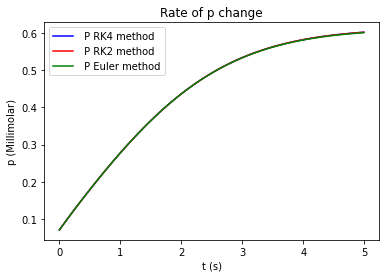

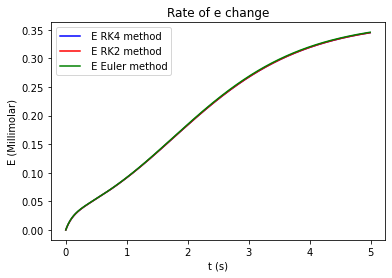

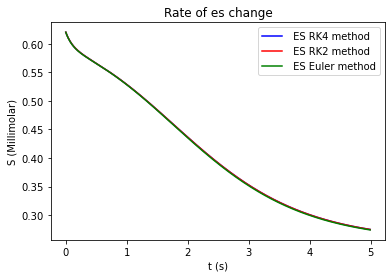

In [8]:
# Experiment 2
def reaction_1(dep):
    S  = dep[0] # Holds S from data array
    P = dep[1] # holds P from data array
    E = dep[2] # holds E from data array
    ES = dep[3] # holds ES from data array
    
# Dependant variables 

    k1 = 1 * 1.5
    k2 = 0.14 / 1.5
    k3 = 0.25 * 1.5
    k4 = 0.66 / 1.5
    
    deriv = np.zeros(4) # array to return derivative values
    
    deriv[0] = -k1*S + k2*P # derivative of S
    deriv[1] = k3*ES - k4*E*P #derivative of p
    deriv[2] = -k1*E*S + k2*ES + k3*ES -k4*E*P # derivative of e
    deriv[3] = k1*E*S - k2*ES - k3*ES + k4*E*P # derivative of es
    
    return deriv
    

#Data set 1 variables
t = 0
h = 0.01
Nsteps = int(5/h)
S = 5 #Molar
P = 0.07 # Molar 
ES = 0.620 # Molar
E = 1.2e-7# Molar

# data set 2 variables
# This is so I can do another for loop for Rk2
t2 = 0

# data set 3 varibales
# This is so I can do another for loop for Euler
t3 = 0

# Data sets for ODE
data = np.array([S,P,E,ES])
data2 = np.array([S,P,E,ES])
data3 = np.array([S,P,E,ES])

# Declaring arrays with length Nsteps

Sarray = np.zeros(Nsteps)
Parray = np.zeros(Nsteps)
Tarray = np.zeros(Nsteps)
Earray = np.zeros(Nsteps)
ESarray = np.zeros(Nsteps)


T2array = np.zeros(Nsteps)
S2array = np.zeros(Nsteps)
P2array = np.zeros(Nsteps)
E2array = np.zeros(Nsteps)
ES2array = np.zeros(Nsteps)

T3array = np.zeros(Nsteps)
S3array = np.zeros(Nsteps)
P3array = np.zeros(Nsteps)
E3array = np.zeros(Nsteps)
ES3array = np.zeros(Nsteps)

Sarray[0] = S
Parray[0] = P
Tarray[0] = t
Earray[0] = E
ESarray[0] = ES

T2array[0] = t2
S2array[0] = S
P2array[0] = P
E2array[0] = E
ES2array[0] = ES

T3array[0] = t3
S3array[0] = S
P3array[0] = P
E3array[0] = E
ES3array[0] = ES

# for loop for RK$ method

for n in range(1,Nsteps):
    
    data = ode.RK4(reaction_1,data,t,h) # Calculates the derivatives by plugging in data and time.
    data2 = ode.RK2(reaction_1,data2,t,h)
    data3 = ode.Euler(reaction_1,data3,t,h)
    t = t+ h # updates time

# Plugs in results from function into each array specified.

    Tarray[n] = t
    Sarray[n] = data[0]
    Parray[n] = data[1]
    Earray[n] = data[2]
    ESarray[n] = data[3]
    
    
    S2array[n] = data2[0]
    P2array[n] = data2[1]
    E2array[n] = data2[2]
    ES2array[n] = data2[3]
    
    
    S3array[n] = data3[0]
    P3array[n] = data3[1]
    E3array[n] = data3[2]
    ES3array[n] = data3[3]
    


    
# Area for graphs
fig = plt.figure()
plt.title("S Vs Time")
plt.plot(Tarray[:int(Nsteps/100)],Sarray[:int(Nsteps/100)], 'b-', label=' S RK4 method')
plt.plot(Tarray[:int(Nsteps/100)],S2array[:int(Nsteps/100)], 'r-', label=' S RK2 method')
plt.plot(Tarray[:int(Nsteps/100)],S3array[:int(Nsteps/100)], 'g-', label=' S Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()
    
fig = plt.figure()
plt.title("S Vs Time")
plt.plot(Tarray,Sarray, 'b-', label=' S RK4 method')
plt.plot(Tarray,S2array, 'r-', label=' S RK2 method')
plt.plot(Tarray,S3array, 'g-', label=' S Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()

fig = plt.figure()
plt.title("P Vs Time")
plt.plot(Tarray,Parray, 'b-', label=' P RK4 method')
plt.plot(Tarray,P2array, 'r-', label=' P RK2 method')
plt.plot(Tarray,P3array, 'g-', label=' P Euler method')
plt.xlabel('t (s)')
plt.ylabel('p (Millimolar)')
plt.legend()
plt.show()


fig = plt.figure()
plt.title("E Vs Time")
plt.plot(Tarray,Earray, 'b-', label=' E RK4 method')
plt.plot(Tarray,E2array, 'r-', label=' E RK2 method')
plt.plot(Tarray,E3array, 'g-', label=' E Euler method')
plt.xlabel('t (s)')
plt.ylabel('E (Millimolar)')
plt.legend()
plt.show()


fig = plt.figure()
plt.title("ES Vs Time")
plt.plot(Tarray,ESarray, 'b-', label=' ES RK4 method')
plt.plot(Tarray,ES2array, 'r-', label=' ES RK2 method')
plt.plot(Tarray,ES3array, 'g-', label=' ES Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()



# Experiment 3

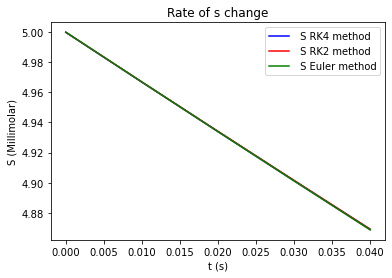

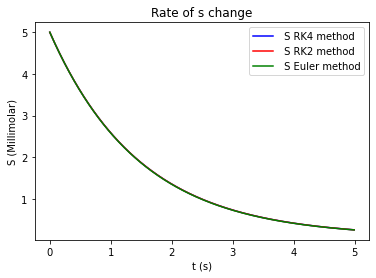

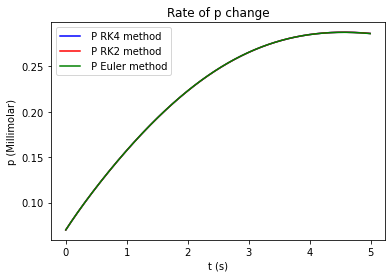

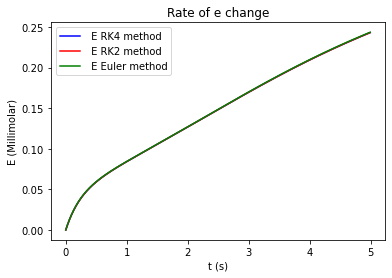

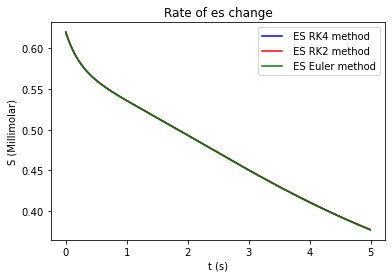

In [9]:
# Experiment 3
def reaction_1(dep, t):
    S  = dep[0] # Holds S from data array
    P = dep[1] # holds P from data array
    E = dep[2] # holds E from data array
    ES = dep[3] # holds ES from data array
    
# Dependant variables 

    k1 = 1 / 1.5
    k2 = 0.14 * 1.5
    k3 = 0.25 / 1.5
    k4 = 0.66 * 1.5
    
    deriv = np.zeros(4) # array to return derivative values
    
    deriv[0] = -k1*S + k2*P # derivative of S
    deriv[1] = k3*ES - k4*E*P #derivative of p
    deriv[2] = -k1*E*S + k2*ES + k3*ES -k4*E*P # derivative of e
    deriv[3] = k1*E*S - k2*ES - k3*ES + k4*E*P # derivative of es
    
    return deriv
    

#Data set 1 variables
t = 0
h = 0.01
Nsteps = int(5/h)
S = 5 #Molar
P = 0.07 # Molar 
ES = 0.620 # Molar
E = 1.2e-7# Molar

# data set 2 variables
# This is so I can do another for loop for Rk2
t2 = 0

# data set 3 varibales
# This is so I can do another for loop for Euler
t3 = 0

# Data sets for ODE
data = np.array([S,P,E,ES])
data2 = np.array([S,P,E,ES])
data3 = np.array([S,P,E,ES])

# Declaring arrays with length Nsteps

Sarray = np.zeros(Nsteps)
Parray = np.zeros(Nsteps)
Tarray = np.zeros(Nsteps)
Earray = np.zeros(Nsteps)
ESarray = np.zeros(Nsteps)


T2array = np.zeros(Nsteps)
S2array = np.zeros(Nsteps)
P2array = np.zeros(Nsteps)
E2array = np.zeros(Nsteps)
ES2array = np.zeros(Nsteps)

T3array = np.zeros(Nsteps)
S3array = np.zeros(Nsteps)
P3array = np.zeros(Nsteps)
E3array = np.zeros(Nsteps)
ES3array = np.zeros(Nsteps)

Sarray[0] = S
Parray[0] = P
Tarray[0] = t
Earray[0] = E
ESarray[0] = ES

T2array[0] = t2
S2array[0] = S
P2array[0] = P
E2array[0] = E
ES2array[0] = ES

T3array[0] = t3
S3array[0] = S
P3array[0] = P
E3array[0] = E
ES3array[0] = ES

# for loop for RK$ method

for n in range(1,Nsteps):
    
    data = ode.RK4(reaction_1,data,t,h) # Calculates the derivatives by plugging in data and time.
    data2 = ode.RK2(reaction_1,data2,t,h)
    data3 = ode.Euler(reaction_1,data3,t,h)
    t = t+ h # updates time

# Plugs in results from function into each array specified.

    Tarray[n] = t
    Sarray[n] = data[0]
    Parray[n] = data[1]
    Earray[n] = data[2]
    ESarray[n] = data[3]
    
    
    S2array[n] = data2[0]
    P2array[n] = data2[1]
    E2array[n] = data2[2]
    ES2array[n] = data2[3]
    
    
    S3array[n] = data3[0]
    P3array[n] = data3[1]
    E3array[n] = data3[2]
    ES3array[n] = data3[3]
    


    
# Area for graphs
fig = plt.figure()
plt.title("S Vs Time")
plt.plot(Tarray[:int(Nsteps/100)],Sarray[:int(Nsteps/100)], 'b-', label=' S RK4 method')
plt.plot(Tarray[:int(Nsteps/100)],S2array[:int(Nsteps/100)], 'r-', label=' S RK2 method')
plt.plot(Tarray[:int(Nsteps/100)],S3array[:int(Nsteps/100)], 'g-', label=' S Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()
    
fig = plt.figure()
plt.title("S Vs Time")
plt.plot(Tarray,Sarray, 'b-', label=' S RK4 method')
plt.plot(Tarray,S2array, 'r-', label=' S RK2 method')
plt.plot(Tarray,S3array, 'g-', label=' S Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()

fig = plt.figure()
plt.title("P Vs Time")
plt.plot(Tarray,Parray, 'b-', label=' P RK4 method')
plt.plot(Tarray,P2array, 'r-', label=' P RK2 method')
plt.plot(Tarray,P3array, 'g-', label=' P Euler method')
plt.xlabel('t (s)')
plt.ylabel('p (Millimolar)')
plt.legend()
plt.show()


fig = plt.figure()
plt.title("E Vs Time")
plt.plot(Tarray,Earray, 'b-', label=' E RK4 method')
plt.plot(Tarray,E2array, 'r-', label=' E RK2 method')
plt.plot(Tarray,E3array, 'g-', label=' E Euler method')
plt.xlabel('t (s)')
plt.ylabel('E (Millimolar)')
plt.legend()
plt.show()


fig = plt.figure()
plt.title("ES Vs Time")
plt.plot(Tarray,ESarray, 'b-', label=' ES RK4 method')
plt.plot(Tarray,ES2array, 'r-', label=' ES RK2 method')
plt.plot(Tarray,ES3array, 'g-', label=' ES Euler method')
plt.xlabel('t (s)')
plt.ylabel('S (Millimolar)')
plt.legend()
plt.show()



# Sources

All information about ode's were given to me by Dr. Titus.

Information on Enzyme kinetics was from a pdf given to me by my professor Dr. Titus